In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.cluster import KMeans

def split_data(data_frame, feature_cols, result_col):
    X = data_frame[feature_cols]
    y = data_frame[result_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    return {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}



In [3]:
def ml_tasks(X_train, X_test, y_train, y_test, n_classes):
    #Tree
    dtc = DecisionTreeClassifier()
    dtc = dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)

    #KNN5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    #KNN10
    knn10 = KNeighborsClassifier(n_neighbors=10)
    knn10.fit(X_train, y_train)

    y_pred_knn10 = knn10.predict(X_test)

    #MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
    mlp = mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)

    plt.ylabel('Custo')
    plt.xlabel('Iteração')
    plt.title("Learning rate =" + str(0.001))
    #loss_curve = plt.plot(mlp.loss_curve_)
    loss_curve = mlp.loss_curve_
    plt.show()

    #Kmeans
    kmeans = KMeans(n_clusters=n_classes)
    kmeans = kmeans.fit(X_train,y_train)
    y_pred_kmeans = kmeans.predict(X_test)
    
    cont = 0
    i = 0
    for pred in y_test:
        if pred == y_pred_kmeans[i]:
            cont = cont + 1
        i = i+1
        
    print(cont, y_test.size)

    # centroides
    centroids = kmeans.cluster_centers_

    #Taxa de acertos
    tree_accuracy = metrics.accuracy_score(y_test, y_pred_dtc) * 100
    knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn) * 100
    knn10_accuracy = metrics.accuracy_score(y_test, y_pred_knn10) * 100
    mlp_accuracy = metrics.accuracy_score(y_test, y_pred_mlp) * 100
    kmeans_accuracy = metrics.accuracy_score (y_test,y_pred_kmeans) * 100
    
    Data = {'Tree': tree_accuracy, 'Knn5': knn_accuracy, 'knn10': knn10_accuracy, 'mlp': mlp_accuracy, 'kmeans': kmeans_accuracy }
    report = {'taxa de acerto': Data, 'loss_curve': loss_curve}
    # #Número de erros
    tree_errors =(data_frame.size/tree_accuracy)
    knn_errors = (data_frame.size/knn_accuracy)
    knn10_errors = (data_frame.size/knn10_accuracy)
    mlp_errors = (data_frame.size/mlp_accuracy)
    kmeans_errors = (data_frame.size/kmeans_accuracy)
    
    #Data = {'Taxa de acerto':   [tree_accuracy, knn_accuracy, knn10_accuracy, mlp_accuracy, kmeans_accuracy]}
    
    print(Data)
    return report

In [4]:
#### WEATEHR DATA IMPORT AND SPLIT

raw_dataset_path1 = "./data/weatherAUS.csv"
weather_raw = pd.read_csv( raw_dataset_path1 ,  delimiter=",", encoding="utf-8-sig")

feature_cols = [ 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindDir9am', 'WindGustDir','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']
weather_filtered = weather_raw[feature_cols]
weather_filtered = weather_filtered.dropna()

column_names = ['WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday', 'RainTomorrow']
label_encoders = {}
for column in column_names:
    label_encoders[column] = preprocessing.LabelEncoder()
    label_encoders[column].fit(weather_filtered[column])
    weather_filtered[column] = label_encoders[column].transform(weather_filtered[column])

weather_filtered = weather_filtered.sample(frac=1)

data_frame = weather_filtered
feature_cols = [ 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindDir9am', 'WindGustDir','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
result_col = ['RainTomorrow']

### IRIS DATA IMPORT AND SPLIT

iris_df = load_iris()
iris_x = iris_df.data
iris_y = iris_df.target 
test_ids = np.random.permutation(len(iris_x))
x_train = iris_x[test_ids[:-30]]
x_test = iris_x[test_ids[-30:]]
y_train = iris_y[test_ids[:-30]]
y_test = iris_y[test_ids[-30:]]



In [5]:
%%capture
data = split_data(data_frame, feature_cols, result_col)
report_weather = ml_tasks(data['X_train'], data['X_test'], data['y_train'], data['y_test'],2)
report_iris = ml_tasks(x_train, x_test, y_train, y_test,3)



## Relatório de desempenho dos algorítimos

Abaixo, segue os resultados da execução dos algoritmos para o dataset `iris` e o de `clima na austrália`.

## Weather Aus

Uma série de atributos de clima irão ser utilizados para responder a pergunta `Choverá amanhã?`.

#### Resultados Algoritmos: 

In [6]:
report_weather['taxa de acerto']
pd.DataFrame.from_dict(report_weather['taxa de acerto'], orient='index')

,0
Tree,78.035048
Knn5,83.672320
knn10,84.172004
mlp,71.405447
kmeans,42.677176


#### Curva de taxa de erro em iterações da MLP:

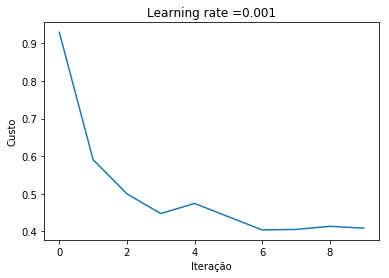

In [7]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_weather['loss_curve'])

## Iris

#### Resultados Algoritmos: 

In [10]:
report_iris['taxa de acerto']
pd.DataFrame.from_dict(report_iris['taxa de acerto'], orient='index')

,0
Tree,96.666667
Knn5,100.000000
knn10,100.000000
mlp,100.000000
kmeans,0.000000


#### Curva de taxa de erro em iterações da MLP:

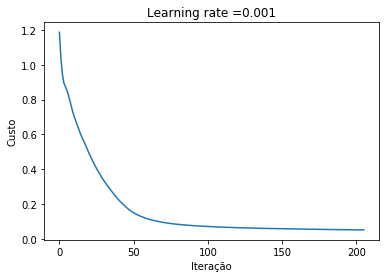

In [9]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_iris['loss_curve'])